Files 

In [130]:
import pandas as pd


train_file=r"D:\ALL\Datasets\country\train.csv"
val_file=r"D:\ALL\Datasets\country\val.txt"
test_file=r"D:\ALL\Datasets\country\test.txt"

Spliting Train data 

In [131]:
train_data=pd.read_csv(train_file,header=None,names=["text","labels"])
print(train_data[:5])

                                                text   labels
0                      i feel so doomed all the time  sadness
1  i remember just knowing you were crazy in love...      joy
2                       i feel so foolish i admitted  sadness
3                        i was feeling quite nervous     fear
4  i want to tell you what im feeling but i dont ...     fear


In [132]:
train_data["text"]=train_data["text"].str.strip()
train_data["labels"]=train_data["labels"].str.strip()
print(train_data["text"][:5])
print(train_data["labels"][:5])

0                        i feel so doomed all the time
1    i remember just knowing you were crazy in love...
2                         i feel so foolish i admitted
3                          i was feeling quite nervous
4    i want to tell you what im feeling but i dont ...
Name: text, dtype: object
0    sadness
1        joy
2    sadness
3       fear
4       fear
Name: labels, dtype: object


Spliting Validation data 

In [133]:
val_data=pd.read_csv(val_file,sep=";",header=None,names=["text","labels"])
print(val_data[:5])

                                                text   labels
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy


Spliting Test data 

In [134]:
test_data=pd.read_csv(test_file,sep=";",header=None,names=["text","labels"])

print(test_data[:5])

                                                text   labels
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


Clean the Texts and store best words

In [136]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.data.path.append("D:\ALL\All_analysis_projects\3rd\nltk_data")
stop_words=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

def clean_text(text):
   text=text.lower()
   text=re.sub(r"[^a-z\s]","",text)
   words=text.split()
   clean_word=[]
   for word in words:
       if word not in stop_words:
         lemma=lemmatizer.lemmatize(word)
         clean_word.append(lemma)
   return " ".join(clean_word)   
   

Cleaned text apply in New column

In [137]:
train_data["clean_text"]=train_data["text"].apply(clean_text)
val_data["clean_text"]=val_data["text"].apply(clean_text)
test_data["clean_text"]=test_data["text"].apply(clean_text)

print(train_data["clean_text"][:5])

0                                     feel doomed time
1    remember knowing crazy love without shadow dou...
2                                feel foolish admitted
3                                feeling quite nervous
4    want tell im feeling dont know start want tell...
Name: clean_text, dtype: object


Lables

In [138]:
train_label=train_data["labels"]
val_label=val_data["labels"]
test_label=test_data["labels"]

print(train_label[:5])

0    sadness
1        joy
2    sadness
3       fear
4       fear
Name: labels, dtype: object


Label Encoding

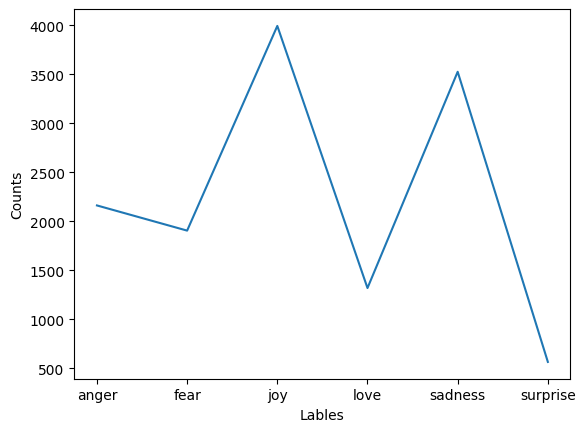

Labels: ['sadness', 'joy', 'sadness', 'fear', 'fear']
Encodes: [4 2 4 1 1]


In [140]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()



labels,num_of_times=np.unique(train_label,return_counts="True")
plt.plot(labels,num_of_times)
plt.xlabel("Lables")
plt.ylabel("Counts")
plt.show()

train_label_encode=encoder.fit_transform(train_label)
val_label_encode=encoder.transform(val_label)
test_label_encode=encoder.transform(test_label)




print("Labels:" ,train_label[:5])
print("Encodes:",train_label_encode[:5])

Text features extraction

In [142]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer(max_features=5000)

x_train_vec=vector.fit_transform(train_data["clean_text"])
valid_vec=vector.transform(val_data["clean_text"])
test_vec=vector.transform(test_data["clean_text"])

with open("emotion_vectors.pkl","wb") as f:
    pickle.dump(vector,f)

Classification Algorithms

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

logistic=LogisticRegression(max_iter=1000,class_weight="balanced")
NB=MultinomialNB(alpha=1)


In [144]:
logistic.fit(x_train_vec,train_label_encode)
NB.fit(x_train_vec,train_label_encode)

Models={"LogisticRegression":logistic,
        "MultinomialNB":NB}
        
with open("emotion_models.pkl","wb") as f:
    pickle.dump(Models,f)

Validation Accuracy

In [145]:
from sklearn.metrics import accuracy_score
validation1=logistic.predict(valid_vec)
validation2=NB.predict(valid_vec)

val_1=accuracy_score(validation1,val_label_encode)
val_2=accuracy_score(validation2,val_label_encode)

print("Logistic validation accuracy:",val_1*100)
print("NB validation  accuracy:",val_2*100)

Logistic validation accuracy: 92.0
NB validation  accuracy: 84.6


Test Accuracy

In [146]:
test1=logistic.predict(test_vec)
test2=NB.predict(test_vec)

test_accuracy1=accuracy_score(test1,test_label_encode)
test_accuracy2=accuracy_score(test2,test_label_encode)

print("Logistic test accuracy:",test_accuracy1*100)
print("NB test accuracy:",test_accuracy2*100)

Logistic test accuracy: 91.55
NB test accuracy: 84.3


Classification Report for Test 

In [147]:
from sklearn.metrics import classification_report
report=classification_report(test1,test_label_encode) 
print(report)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       303
           1       0.96      0.91      0.93       235
           2       0.87      0.98      0.92       621
           3       0.99      0.71      0.83       222
           4       0.89      0.98      0.93       526
           5       1.00      0.71      0.83        93

    accuracy                           0.92      2000
   macro avg       0.95      0.86      0.90      2000
weighted avg       0.92      0.92      0.91      2000



Prediction

In [150]:
text=["i can have for a treat or if i am feeling festive"]

vec=vector.transform(text)
result=logistic.predict(vec)

if result==0:
    print("Anger")
elif result==1: 
    print("Fear")   
elif result==2:
    print("Joy")
elif result==3:
    print("Love")
elif result==4:
    print("Sadness") 
else:
    print("Surprice")               

Joy
